In [20]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Scraping a Table from HTML
Create a parse tree from an HTML using the following packages
* __reqests__ pulls website data from the given URL
* __html.parser__ is used in conjunction w/beautifulsoup in order to create the parse tree
* use the __prettify__ funciton to view the parsed data 

In [ ]:
# store url as an onject
url = 'https://en.wikipedia.org/wiki/List_of_capitals_in_the_United_States#State_capitals'
# request url information be retrieved
r = requests.get(url)

# parse data and print using prettify()
us_capitals = BeautifulSoup(r.text, 'html.parser')
print(us_capitals.prettify())

Extracting text and other information from the html

In [4]:
# print the title of the webpage
title = us_capitals.title.text
print("Title = ", title)

Title =  List of capitals in the United States - Wikipedia


In [5]:
# find tables within the parse tree
table = us_capitals.find('table', {'class': 'wikitable plainrowheaders sortable'})

# create empty lists to store data
rows = table.find_all('tr')
table_data = []

# Loop through rows and extract data
for row in rows:
    columns = row.find_all(['th', 'td'])
    row_data = [col.text.strip() for col in columns]
    table_data.append(row_data)

# Print the table data
for row in table_data:
    print(row)
else:
    print("Failed to retrieve the Wikipedia page.")

['State', 'Capital', 'Since', 'Area (mi2)', 'Population (2020 US Census)', 'Rank in state(city proper)']
['Proper', 'MSA/µSA', 'CSA']
['Alabama', 'Montgomery', '1846', '159.8', '200,603', '386,047', '476,207', '3']
['Alaska', 'Juneau', '1906', '2716.7', '32,255', '32,255', '', '3']
['Arizona', 'Phoenix', '1912', '517.6', '1,608,139', '4,845,832', '4,899,104', '1']
['Arkansas', 'Little Rock', '1821', '116.2', '202,591', '748,031', '912,604', '1']
['California', 'Sacramento', '1854', '97.9', '524,943', '2,397,382', '2,680,831', '6']
['Colorado', 'Denver', '1867', '153.3', '715,522', '2,963,821', '3,623,560', '1']
['Connecticut', 'Hartford', '1875', '17.3', '121,054', '1,213,531', '1,482,086', '4']
['Delaware', 'Dover', '1777', '22.4', '39,403', '181,851', '7,379,700', '2']
['Florida', 'Tallahassee', '1824', '95.7', '196,169', '384,298', '', '8']
['Georgia', 'Atlanta', '1868', '133.5', '498,715', '6,089,815', '6,930,423', '1']
['Hawaii', 'Honolulu', '1845', '68.4', '350,964', '1,016,508',

In [6]:
# remove second and last rows
table_data.pop(0)
table_data.pop(0)
table_data.pop(-1)

['[24][25][26]']

In [7]:
# display new list of lists
table_data

[['Alabama',
  'Montgomery',
  '1846',
  '159.8',
  '200,603',
  '386,047',
  '476,207',
  '3'],
 ['Alaska', 'Juneau', '1906', '2716.7', '32,255', '32,255', '', '3'],
 ['Arizona',
  'Phoenix',
  '1912',
  '517.6',
  '1,608,139',
  '4,845,832',
  '4,899,104',
  '1'],
 ['Arkansas',
  'Little Rock',
  '1821',
  '116.2',
  '202,591',
  '748,031',
  '912,604',
  '1'],
 ['California',
  'Sacramento',
  '1854',
  '97.9',
  '524,943',
  '2,397,382',
  '2,680,831',
  '6'],
 ['Colorado',
  'Denver',
  '1867',
  '153.3',
  '715,522',
  '2,963,821',
  '3,623,560',
  '1'],
 ['Connecticut',
  'Hartford',
  '1875',
  '17.3',
  '121,054',
  '1,213,531',
  '1,482,086',
  '4'],
 ['Delaware', 'Dover', '1777', '22.4', '39,403', '181,851', '7,379,700', '2'],
 ['Florida', 'Tallahassee', '1824', '95.7', '196,169', '384,298', '', '8'],
 ['Georgia',
  'Atlanta',
  '1868',
  '133.5',
  '498,715',
  '6,089,815',
  '6,930,423',
  '1'],
 ['Hawaii', 'Honolulu', '1845', '68.4', '350,964', '1,016,508', '', '1'],
 ['I

In [8]:
# turn lists of lists into a data frame
capitals_df = pd.DataFrame(table_data, columns = ['State', 'Capital', 'Since', 'Area_mi2', '2020_Population', 'a', 'b', 'c'])

# remove columns with additional unwanted population estimates
columns_to_drop = ['a', 'b', 'c']
capitals_df = capitals_df.drop(columns = columns_to_drop)

# Convert 'Population' and 'Area (sq. mi)' columns to floats
capitals_df['Area_mi2'] = pd.to_numeric(capitals_df['Area_mi2'], errors='coerce')
capitals_df['2020_Population'] = capitals_df['2020_Population'].str.replace(',','').astype(int)

# view data frame
capitals_df.head()

,State,Capital,Since,Area_mi2,2020_Population
0,Alabama,Montgomery,1846,159.8,200603
1,Alaska,Juneau,1906,2716.7,32255
2,Arizona,Phoenix,1912,517.6,1608139
3,Arkansas,Little Rock,1821,116.2,202591
4,California,Sacramento,1854,97.9,524943


In [9]:
type(capitals_df['2020_Population'])

pandas.core.series.Series

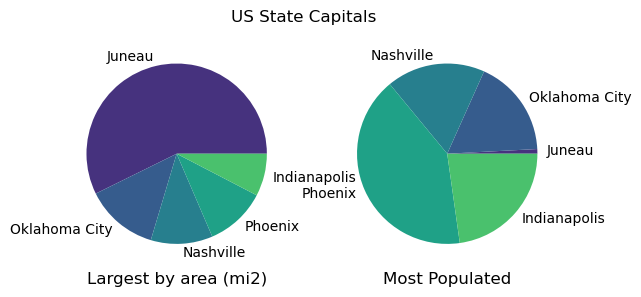

In [11]:
# sort the data by area
capitals_sorted = capitals_df.sort_values(by='Area_mi2', ascending=False)

#chose the 5 largest states
largest_states = capitals_sorted.head(5)

# sort the data by population and choose the 5 largest
capitals_sorted_2 = capitals_df.sort_values(by='Area_mi2', ascending=False)
high_pop_states = capitals_sorted_2.head(5)

# set color palette
sns.set_palette("viridis")

# create a plot
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(largest_states['Area_mi2'], labels=largest_states['Capital'])
ax2.pie(high_pop_states['2020_Population'], labels=high_pop_states['Capital'])

ax1.set_xlabel('Largest by area (mi2)', size=12)
ax2.set_xlabel('Most Populated', size=12)
fig.suptitle('US State Capitals')
plt.subplots_adjust(top=1.25)


## Key Functions within Beautiful Soup

### Creating a parse tree
The primary function of Beautiful Soup is to convert HTML and XML files into a more organized structure, known as a __parse tree__. Other popular functions within this library are used for navigating, extracting, or editing information in the parse tree.
    
``` python
    # store and retrieve url
    url = 'https://en.wikipedia.org/wiki/'
    r = requests.get(url) # NOTE: requests is an additional library
    
    # create the parse tree using prettify and an html parser
    parse_tree = BeautifulSoup(r.text, 'html.parser')
    parse_tree.prettify()
```
The prettify() function will convert the HTML from a condensed format:

```html
    <html><head><title>The Dormouse's story</title></head><body>
    <p class="title"><b>The Dormouse's story</b></p>
    <p class="story">Once upon a time there were three little sisters; and their names were
    <a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
    <a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
    <a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
    and they lived at the bottom of a well.</p>
    <p class="story">...</p>
```
to a clearly nested parse tree: 
```html
    # <html>
    #  <head>
    #   <title>
    #    The Dormouse's story
    #   </title>
    #  </head>
    #  <body>
    #   <p class="title">
    #    <b>
    #     The Dormouse's story
    #    </b>
    #   </p>
    #   <p class="story">
    #    Once upon a time there were three little sisters; and their names were
    #    <a class="sister" href="http://example.com/elsie" id="link1">
    #     Elsie
    #    </a>
    #    ...
    #   </p>
    #  </body>
    # </html>
```



### Extract Information Using HTML Tags
HTML tags are used to indicate the beginning and end of an HTML element. They are typically contained within '< >' In this first example, we are using the HTML tag __'title'__ in order to extract the title of the parse tree created using __prettify()__.

#### Extract Title
__HTML Code:__
```html
    <html>
        <head>
            <title>Our Example Title</title>
        <head>
    <html>
```

__In Python:__
``` python
    # HTML with a single title
    print(parse_tree.title)
    Our Example Title
```

##### Additional HTML Tags
Uses these HTML tags to extract and print elements from the parse tree. 

|  HTML tag  |    Element Type   |
|------------|-------------------|
|    p       | paragraph of text |
| h1, h2, h3 | header levels     |
|    a       | hyperlink         |
|   img      | image             |
| ul         | unordered list    |
| ol         | ordered list      |
|  li        | item within a list|
|  th        | table header      |
|  td        | table data        |


#### Searching the Parse Tree
When extracting information using the HTML tag, only the first value with the matching element type will be printed. For example, running the code below will only print the first link in the parse tree. 
 
```Python
    # Finding the first link in the tree
    parse_tree.a
    https//website-one.com
```

Search functions are used to extract values with the same element type. For example, the __find()__ and __find_all()__ functions can be used to extract all website links instead of only the first one.

```Python
    # Finding all the links in a HTML file
    parse_tree.find_all('a')
    https//website-one.com
    https//website-two.com
    https//website-three.com
```

### Navigating the Parse Tree
The parse tree is a nested data structure where HTML tags and strings may be contained within other tags. Additional functions of the Beautiful Soup library are designed to move up, down, or sideways within the parse tree. 

* __Moving down the tree__
    * .contents()
    * .children()
    * .descendants()
* __Moving up the tree__
    * .parent()
    * .parents()
* __Sideways__
    * .next_sibling()
    * .previous_sibling()
* __Back and forth__
    * .next_element()
    * .previous_element()